# Reducción de dimensionalidad

# Principal Component Analysis (PCA)

PCA es una técnica estadística que proyecta los datos originales, posiblemente correlacionados, sobre "ejes" <font color=#00B0F0 size=4>ortogonales</font>, llamados <font color=#00B050 size=4>componentes principales</font>.

Además, permite tomar un conjunto de datos de cierta dimensionalidad y proyectarlo a un espacio <font color=#ED7D31 size=4>de menor dimensión</font>, en el que las direcciones donde hay una mayor varianza en los datos sean los nuevos ejes.

Esencialmente, PCA es un algoritmo de reducción de dimensionalidad, pero puede ser utilizado con fines de visualización, filtrado de ruido, o extracción de características.



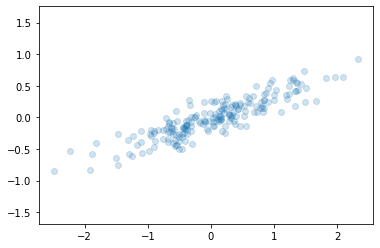

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def draw_vector(v0, v1, c, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0, color=c)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.figure(1)
plt.scatter(X[:, 0], X[:, 1],alpha=0.2)
plt.axis('equal');

pca = PCA(n_components=2)
pca.fit(X)

# plot data
i=0
color=['r','g']
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v, color[i])
    i+=1
plt.axis('equal');
plt.xlabel('Atributo 1')
plt.ylabel('Atributo 2');
plt.show()

print('PCA components:\n',pca.components_)
print('\nExplained variance:\n',pca.explained_variance_)
print('\nExplained variance (%):\n',pca.explained_variance_ratio_)


Componentes principales:
 [[ 0.90979151  0.41506555]
 [-0.41506555  0.90979151]]

Varianza explicada:
 [0.81330494 0.04870314]

Varianza explicada (%):
 [0.94350037 0.05649963]


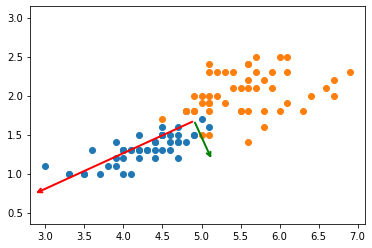

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA

feat = [2,3]
iris = datasets.load_iris()
X = iris.data[50:150,feat]
y = iris.target[50:150]

def draw_vector(v0, v1, c, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    color=c)
    ax.annotate('', v1, v0, arrowprops=arrowprops)


# plot data
plt.scatter(X[y==1, 0], X[y==1, 1]);
plt.scatter(X[y==2, 0], X[y==2, 1]);
plt.axis('equal');

pca = PCA(n_components=2)
pca.fit(X)
print('Componentes principales:\n',pca.components_)
print('\nVarianza explicada:\n',pca.explained_variance_)
print('\nVarianza explicada (%):\n',pca.explained_variance_ratio_)

i=0
color=['r','g']
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 2.5 * np.sqrt(length)
    #print(pca.mean_,pca.mean_+v)
    draw_vector(pca.mean_, pca.mean_ - v, color[i])
    i+=1
plt.axis('equal');
# plt.xlim(1,4)
# plt.ylim(-0.0,3);

## Reducción de dimensionalidad
De cuatro variables (aunque sólo graficamos dos), los datos son proyectados a una sola

Tamaño original:    (100, 4)
Tamaño transformado: (100, 1)


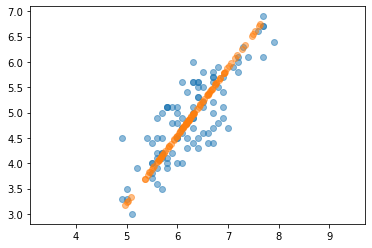

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA

iris = datasets.load_iris()
X = iris.data[50:150,:]
y = iris.target[50:150]

pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("Tamaño original:   ", X.shape)
print("Tamaño transformado:", X_pca.shape)

X_new = pca.inverse_transform(X_pca)
id1, id2 = 0, 2
plt.scatter(X[:, id1], X[:, id2], alpha=0.5)
plt.scatter(X_new[:, id1], X_new[:, id2], alpha=0.5)
plt.axis('equal');

## Visualización
En algunas ocasiones es necesario tener una idea de cómo los datos están distribuidos en el espacio de características.
Para el ejemplo del dataset de las plantas de iris que tiene 4 variables (mostrado aquí abajo) quizás no nos parezca tan útil esta herramienta.

Sin embargo, si tomamos en cuenta el dataset de los dígitos escritos a mano, que consiste en imágenes que, aunque son muy pequeñas (8x8 px) no podríamos imaginar una gráfica de 64 variables. En este caso, PCA puede ser bastante útil para visualizar la distribución de las imágenes.


Tamaño original:    (150, 4)
Tamaño transformado: (150, 2)
Visualization


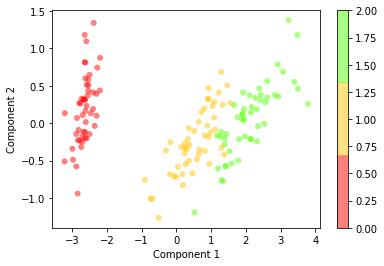

In [ ]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import numpy as np
import cv2

iris = load_iris()

pca = PCA(2)  # project from 4 to 2 dimensions
projected = pca.fit_transform(iris.data)
print("Tamaño original:   ", iris.data.shape)
print("Tamaño transformado:", projected.shape)
print('Visualization')

filtered = pca.inverse_transform(projected)

plt.figure(1)
plt.scatter(projected[:, 0], projected[:, 1],
            c=iris.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('prism',3))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar();

Tamaño original:    (1797, 64)
Tamaño transformado: (1797, 2)


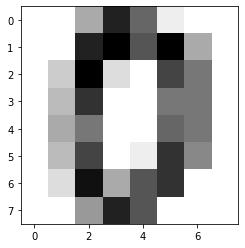

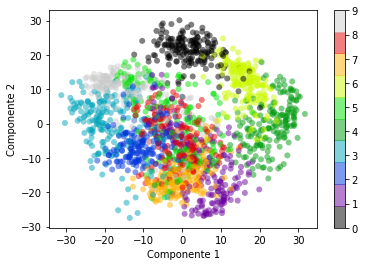

In [ ]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import numpy as np
import cv2

digits = load_digits()

pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print("Tamaño original:   ", digits.data.shape)
print("Tamaño transformado:", projected.shape)

filtered = pca.inverse_transform(projected)

plt.figure(1)
plt.imshow(digits.data[0].reshape(8,8), cmap='binary')

plt.figure(2)
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.colorbar();



## Filtrado
Se toma como ejemplo el dataset de los dígitos escritos a mano.
Aquí, se añadió ruido al dataset ingresando algunos valores aleatorios a los pixeles.
De este dataset ruidoso se obtienen los dos primeros componentes principales.
Finalmente, se aplica la operación inversa de PCA a los dos primeros componentes en los cuales se proyectó el dataset.


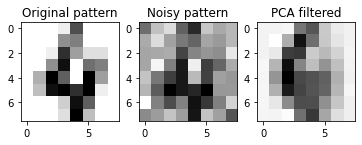

Porcentaje de varianza explicada:
 [0.08720679 0.08150014]


In [ ]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import numpy as np

digits = load_digits()
noisy = np.random.normal(digits.data, 4)


pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(noisy)

filtered = pca.inverse_transform(projected)

idx=4
plt.figure(1);
plt.subplot(131)
plt.imshow(digits.data[idx].reshape(8,8), cmap='binary')
plt.title('Original pattern')
plt.subplot(132)
plt.imshow(noisy[idx].reshape(8,8), cmap='binary')
plt.title('Noisy pattern')
plt.subplot(133)
plt.imshow(filtered[idx].reshape(8,8), cmap='binary')
plt.title('PCA filtered')
plt.show()

print('Porcentaje de varianza explicada:\n',pca.explained_variance_ratio_)


# Linear Discriminant Analysis (LDA)

## Reducción de dimensionalidad
De cuatro variables del dataset de iris, los datos son proyectados a solo dos.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()
X = iris.data
y = iris.target

lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X,y)
X_lda = lda.transform(X)
print("Tamaño original:   ", X.shape)
print("Tamaño transformado:", X_lda.shape)
print('\nCoeficientes lineales:\n',lda.coef_)
print('\nVarianza explicada (%):\n',lda.explained_variance_ratio_)
print('\nProbabilidades de clase:\n',lda.priors_)

Tamaño original:    (150, 4)
Tamaño transformado: (150, 2)

Coeficientes lineales:
 [[  6.31475846  12.13931718 -16.94642465 -20.77005459]
 [ -1.53119919  -4.37604348   4.69566531   3.06258539]
 [ -4.78355927  -7.7632737   12.25075935  17.7074692 ]]

Varianza explicada (%):
 [0.9912126 0.0087874]

Probabilidades de clase:
 [0.33333333 0.33333333 0.33333333]


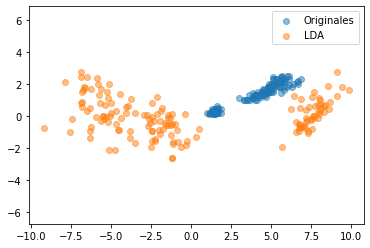

In [ ]:
id1, id2 = 2, 3
plt.scatter(X[:, id1], X[:, id2], alpha=0.5, label='Originales')
plt.scatter(X_lda[:, 0], X_lda[:, 1], alpha=0.5, label='LDA')
plt.legend()
plt.axis('equal');

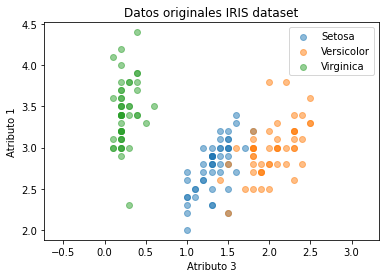

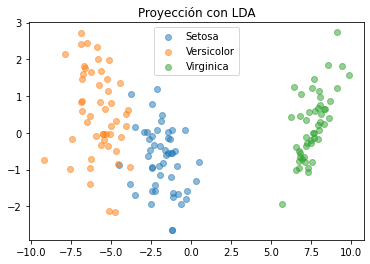

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

plt.figure()
for i, target_name in zip([1,2,0], target_names):
  plt.scatter(X[y == i,3], X[y == i,1], alpha=.5, label=target_name.capitalize());
plt.axis('equal');
plt.legend(loc='best', shadow=False, scatterpoints=1);
plt.title('Datos originales IRIS dataset');
plt.xlabel('Atributo 3')
plt.ylabel('Atributo 1')
plt.show()


lda = LinearDiscriminantAnalysis(n_components=2)
X = lda.fit(X, y).transform(X)

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']

for i, target_name in zip([1, 2,0], target_names):
    plt.scatter(X[y == i, 0], X[y == i, 1], alpha=.5, label=target_name.capitalize());
plt.legend(loc='best', shadow=False, scatterpoints=1);
plt.title('Proyección con LDA');
plt.show();


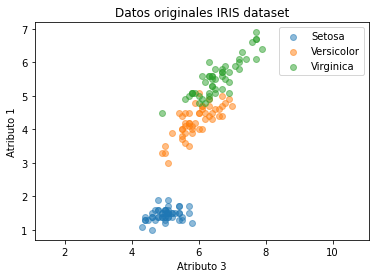

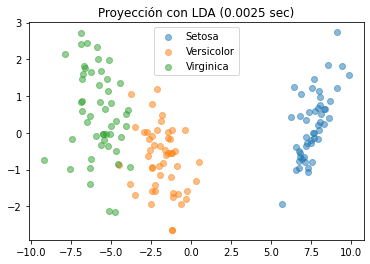

Accuracy: 98.0%


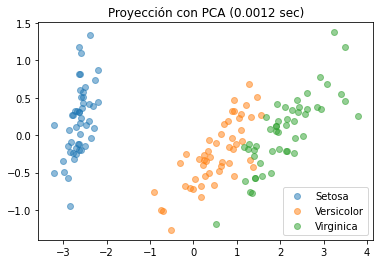

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from time import time

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

clases = [0,1,2]

plt.figure()
for i, target_name in zip(clases, target_names):
  plt.scatter(X[y == i,0], X[y == i,2], alpha=.5, label=target_name.capitalize());
plt.axis('equal');
plt.legend(loc='best', shadow=False, scatterpoints=1);
plt.title('Datos originales IRIS dataset');
plt.xlabel('Atributo 3')
plt.ylabel('Atributo 1')
plt.show()

#------------------LDA----------------------
lda = LinearDiscriminantAnalysis(n_components=2)
t0 = time()
X_lda = lda.fit(X, y).transform(X)
t1 = time()

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']

for i, target_name in zip(clases, target_names):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], alpha=.5, label=target_name.capitalize());
plt.legend(loc='best', shadow=False, scatterpoints=1);
plt.title('Proyección con LDA (%.2g sec)' % (t1 - t0));
plt.show();

print(f'Accuracy: {100*lda.score(X,y)}%')

#------------------PCA----------------------
pca = PCA(n_components=2)
t0 = time()
X_pca = pca.fit(X).transform(X)
t1 = time()

plt.figure()
for i, target_name in zip(clases, target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], alpha=.5, label=target_name.capitalize());
plt.legend(loc='best', shadow=False, scatterpoints=1);
plt.title('Proyección con PCA (%.2g sec)' % (t1 - t0));
plt.show();



## Visualización
Para visualizar mejor los datos. Ejemplo de los dígitos escritos a mano.

Visualización


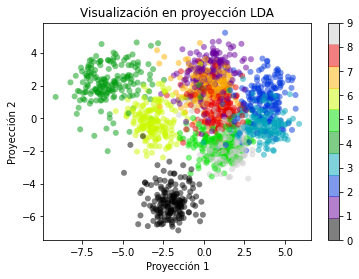

In [ ]:
from sklearn.datasets import load_digits
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from matplotlib import pyplot as plt
import numpy as np
import cv2

digits = load_digits()
X = digits.data
y = digits.target

lda = LinearDiscriminantAnalysis(n_components=2)  # project from 64 to 2 dimensions
projected = lda.fit(X, y).transform(X)
#projected = lda.transform(digits.data)
#print(digits.data.shape)
#print(projected.shape)
print('Visualización')

plt.figure()
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('Proyección 1')
plt.ylabel('Proyección 2')
plt.title('Visualización en proyección LDA')
plt.colorbar();



# Multidimensional Scaling (MDS)

## Reducción de dimensionalidad
De cuatro variables del dataset de iris, los datos son proyectados a solo dos.

MDS: 0.86 sec
(150, 2)


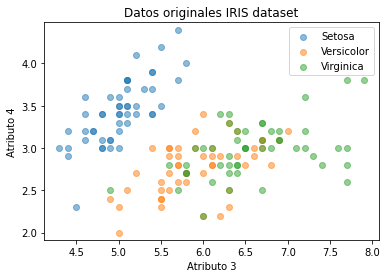

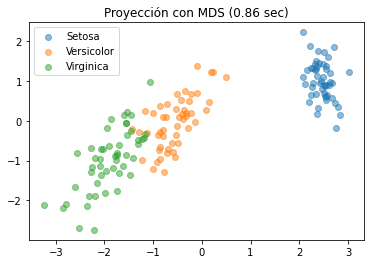

In [ ]:
import numpy as np
from time import time
from matplotlib import pyplot as plt
from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn import datasets
#from matplotlib.ticker import NullFormatter

iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names
clases = [0,1,2]

mds = manifold.MDS(n_components=2)

t0 = time()
X_mds = mds.fit_transform(X)
t1 = time()
print("MDS: %.2g sec" % (t1 - t0))
print(X_mds.shape)

plt.figure()
for i, target_name in zip(clases, target_names):
  plt.scatter(X[y == i,2], X[y == i,3], alpha=.5, label=target_name.capitalize());
plt.axis('equal');
plt.legend(loc='best', shadow=False, scatterpoints=1);
plt.title('Datos originales IRIS dataset');
plt.xlabel('Atributo 3')
plt.ylabel('Atributo 4')
plt.show();

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
for i, target_name in zip(clases, target_names):
    plt.scatter(X_mds[y == i, 0], X_mds[y == i, 1], alpha=.5, label=target_name.capitalize());
plt.legend(loc='best', shadow=False, scatterpoints=1);
plt.title('Proyección con MDS (%.2g sec)' % (t1 - t0));
plt.show();


## Visualización
Para visualizar mejor los datos. Ejemplo de los dígitos escritos a mano.

Digits read!
Manifold created!
MDS: 39 sec
(1797, 2)


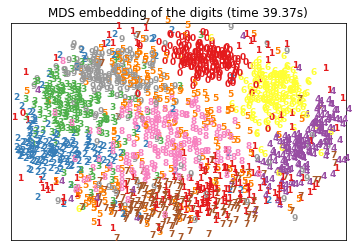

In [ ]:
import numpy as np
from time import time
from matplotlib import pyplot as plt
from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn import datasets
from matplotlib.ticker import NullFormatter
from matplotlib import offsetbox

# ----------------------------------------------------------------------
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9});

    '''if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)''';
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)
# ----------------------------------------------------------------------

digits = datasets.load_digits(n_class=10)
X = digits.data
y = digits.target
n_samples, n_features = X.shape
print('Digits read!')

mds = manifold.MDS(n_components=2, max_iter=100)
print('Manifold created!')
#mds = manifold.MDS(n_components=2, n_init=1, max_iter=100)
t0 = time()
X_mds = mds.fit_transform(X)
t1 = time()
print("MDS: %.2g sec" % (t1 - t0))
print(X_mds.shape )

plot_embedding(X_mds,
               "MDS embedding of the digits (time %.2fs)" %
               (t1 - t0))
plt.grid();
plt.show();


# t-distributed Stochastic Neighbor Embedding (t-SNE)

## Reducción de dimensionalidad
De cuatro variables del dataset de iris, los datos son proyectados a solo dos.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


t-SNE: 0.48 sec
(150, 2)


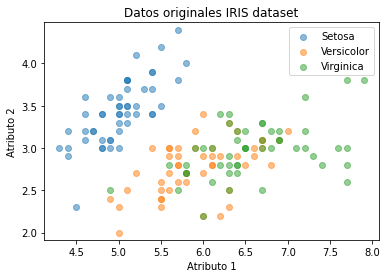

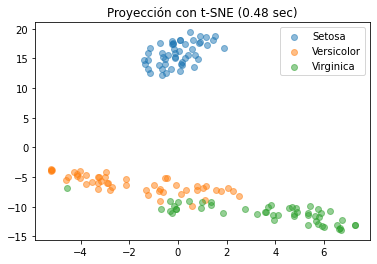

In [ ]:
import numpy as np
from time import time
from matplotlib import pyplot as plt
from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn import datasets
#from matplotlib.ticker import NullFormatter

iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names
clases = [0,1,2]

t_sne = manifold.TSNE(n_components=2, n_iter=350, random_state=10)

t0 = time()
X_tsne = t_sne.fit_transform(X)
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))
print(X_tsne.shape )

plt.figure()
for i, target_name in zip(clases, target_names):
  plt.scatter(X[y == i,0], X[y == i,1], alpha=.5, label=target_name.capitalize());
plt.axis('equal');
plt.legend(loc='best', shadow=False, scatterpoints=1);
plt.title('Datos originales IRIS dataset');
plt.xlabel('Atributo 1')
plt.ylabel('Atributo 2')
plt.show();

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
for i, target_name in zip(clases, target_names):
    plt.scatter(X_tsne[y == i, 0], X_tsne[y == i, 1], alpha=.5, label=target_name.capitalize());
plt.legend(loc='best', shadow=False, scatterpoints=1);
plt.title('Proyección con t-SNE (%.2g sec)' % (t1 - t0));
plt.show();


## Visualización
Para visualizar mejor los datos. Ejemplo de los dígitos escritos a mano.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


t-SNE: 4 sec
(1797, 2)


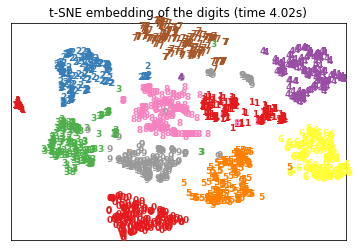

In [ ]:
import numpy as np
from time import time
from matplotlib import pyplot as plt
from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn import datasets
#from matplotlib.ticker import NullFormatter
#from matplotlib import offsetbox

# ----------------------------------------------------------------------
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9});

    '''if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox);'''
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)
# ----------------------------------------------------------------------

digits = datasets.load_digits(n_class=10)
X = digits.data
y = digits.target
n_samples, n_features = X.shape

t_sne = manifold.TSNE(n_components=2, n_iter=280, random_state=10)

t0 = time()
X_tsne = t_sne.fit_transform(X)
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))
print(X_tsne.shape )

plot_embedding(X_tsne,
               "t-SNE embedding of the digits (time %.2fs)" %
               (t1 - t0))
plt.show();
